**Exercise 1 Accuracy of classifier model with Keras**
1. Import the 'one_hot', 'pad_sequences', 'Sequential', 'Dense, Flatten',
'Embedding', and 'pandas' libraries.
2. Define the corpus with the following sentences: This is good pizza, I
love Italian pizza, The best pizza, nice pizza, Excellent pizza, I love
pizza, The pizza was alright, disgusting pineapple pizza, not good
pizza, bad pizza, very bad pizza, I had better pizza.
3. Create class labels for each sentence '1' for positive and '0' for
negative.
4. Create a data frame with 'text' as corpus and 'sentiment' as labels.
5. Extract the vocabulary from the corpus and encode it.
6. Pad the document to the maximum length of the longest sentences to
have uniform length.
7. Define the model with Keras with Embedding (None, 5.8) as output
shape, Flatten (None, 40), and Dense (None, 1).
8. Use epochs = 50, optimizer ='adam', loss='binary_crossentropy', and
metrics=['acc'].
9. What are your conclusions about the model?

**Exercise 2**

1. Load nltk, pandas, re, numpy, and matplotlb.
2. Use the Tweets.csv file in Google Drive

3. Take a look at the first five rows.
4. Plot the shares of airlines mentioned in the data.
5. Plot the percentage of positive, negative, and neutral sentiments.
6. In a bar chart, show the number of positive, negative, and neutral
comments by airline.
7. Using Seaborn, show airlines' sentiment confidence.
8. Define the features and labels.
9. Clean the tweets.
10. Vectorize the tweets.
11. Create a train and test (20%) dataset.
12. Import the RandomClassifier model.
13. Define the 'predictions'.
14. Generate the confusion matrix, the classification report, and the
accuracy score.
15. What is your conclusion?

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding


In [2]:
corpus = [
    "This is good pizza",
    "I love Italian pizza",
    "The best pizza",
    "nice pizza",
    "Excellent pizza",
    "I love pizza",
    "The pizza was alright",
    "disgusting pineapple pizza",
    "not good pizza",
    "bad pizza",
    "very bad pizza",
    "I had better pizza"
]


In [3]:
class_labels = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]
class_labels = np.array(class_labels)

In [4]:
df = pd.DataFrame({'text': corpus, 'sentiment': class_labels})
print(df)

                          text  sentiment
0           This is good pizza          1
1         I love Italian pizza          1
2               The best pizza          1
3                   nice pizza          1
4              Excellent pizza          1
5                 I love pizza          1
6        The pizza was alright          0
7   disgusting pineapple pizza          0
8               not good pizza          0
9                    bad pizza          0
10              very bad pizza          0
11          I had better pizza          1


In [5]:
token = Tokenizer()
token.fit_on_texts(corpus)

corpus_encoded = token.texts_to_sequences(corpus)

In [6]:
max_length = max([len(sentence) for sentence in corpus_encoded])
padded_corpus = pad_sequences(corpus_encoded, maxlen=max_length, padding='post')

req_model = Sequential()
req_model.add(Embedding(input_dim=len(token.word_index) + 1, output_dim=8, input_length=max_length))
req_model.add(Flatten())
req_model.add(Dense(1, activation='sigmoid'))

In [7]:
req_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


req_model.fit(padded_corpus, class_labels, epochs=50)
#Model Evaluation
loss, accuracy = req_model.evaluate(padded_corpus, class_labels)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
1/1 [==============================] - 1s 534ms/step - loss: 0.6996 - accuracy: 0.4167
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.4167
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6957 - accuracy: 0.4167
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6938 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.7500
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6863 - accuracy: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6825 - accuracy: 0.8333
Epoch 11/50
1/1 [====================

**EXERCISE 2**

In [8]:
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.dummy import DummyClassifier

In [9]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
tweets_df = pd.read_csv('/content/Tweets.csv')
tweets_df.head()




,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


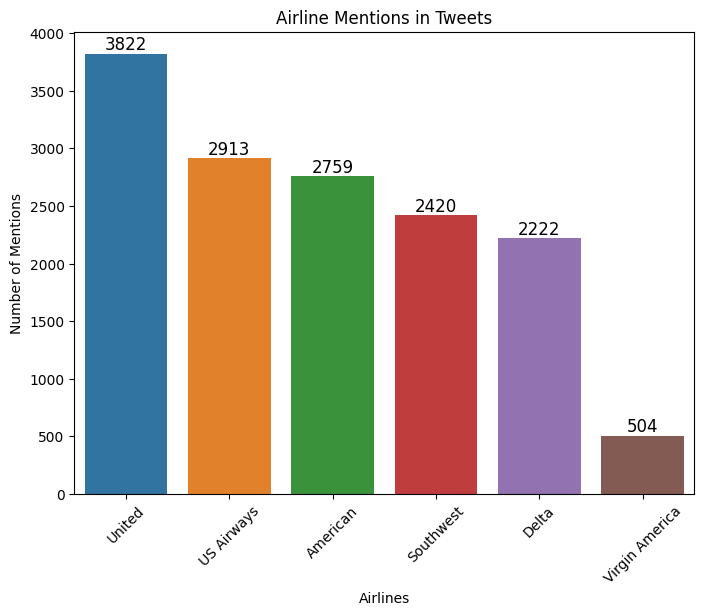

In [11]:
import seaborn as sns
#shares of airlines mentioned in the data
airline_counts = tweets_df['airline'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.xlabel('Airlines')
plt.ylabel('Number of Mentions')
plt.title('Airline Mentions in Tweets')
plt.xticks(rotation=45)
for i, count in enumerate(airline_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


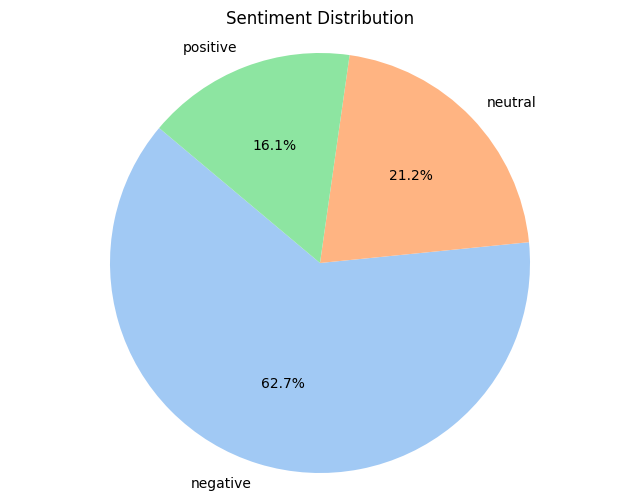

In [12]:
#percentage of positive, negative, and neutral sentiments
sentiment_counts = tweets_df['airline_sentiment'].value_counts()

colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


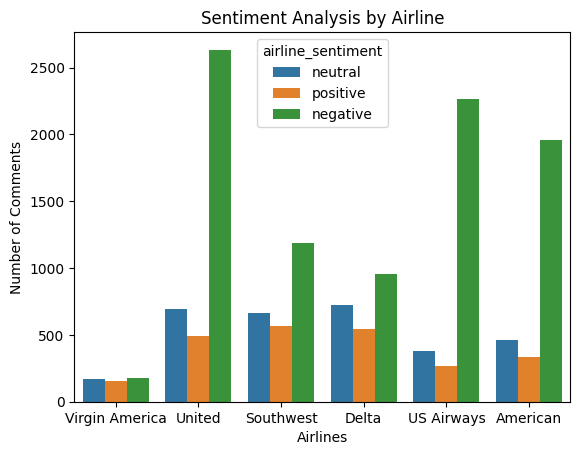

In [13]:
#Bar chart showing the number of positive, negative, and neutral comments by airline
sns.countplot(x='airline', hue='airline_sentiment', data=tweets_df)
plt.xlabel('Airlines')
plt.ylabel('Number of Comments')
plt.title('Sentiment Analysis by Airline')
plt.show()


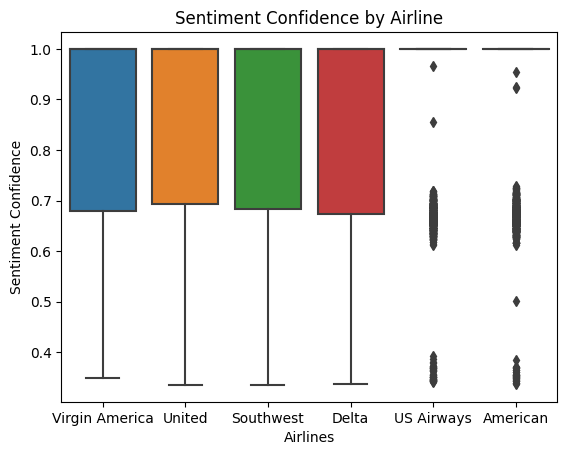

In [14]:
# Using Seaborn, show airlines' sentiment confidence
sns.boxplot(x='airline', y='airline_sentiment_confidence', data=tweets_df)
plt.xlabel('Airlines')
plt.ylabel('Sentiment Confidence')
plt.title('Sentiment Confidence by Airline')
plt.show()

In [15]:
features = tweets_df['text']
labels = tweets_df['airline_sentiment']

def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', ' ', tweet)
    tweet = re.sub(r'#', ' ', tweet)
    tweet = re.sub(r'RT[\s]+', ' ', tweet)
    tweet = re.sub(r'https?:\/\/\S+', ' ', tweet)
    tweet = re.sub(r'[^A-Za-z]+', ' ', tweet)
    tweet = tweet.lower()
    return tweet

cleaned_tweets = features.apply(clean_tweet)

In [16]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(cleaned_tweets)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=30)


In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [18]:
confusion_mat = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
 [[1686  108   41]
 [ 294  292   47]
 [ 153   52  255]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1835
     neutral       0.65      0.46      0.54       633
    positive       0.74      0.55      0.64       460

    accuracy                           0.76      2928
   macro avg       0.73      0.64      0.67      2928
weighted avg       0.75      0.76      0.75      2928

Accuracy: 76.26%
